In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
# norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64_7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [5]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()

In [6]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    7.147575
1    4.226101
2    2.159997
3    0.865817
4    0.340097
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [7]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_alpha,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
0,0,train,0,0.001040,803.467468,20.919371,-0.000919,124.344971,2.431108,9.759704e-01,...,347.632355,3.174547,0.517116,0.000000e+00,1.279820,0.716923,0.000000,0.000000,0.000000,1.035130e+00
5,0,train,0,-0.003932,670.802124,16.511274,-0.000919,124.344971,2.431108,9.581059e-01,...,347.632355,3.174547,0.535188,-1.192093e-08,1.269293,0.710143,0.000000,0.000000,0.000000,1.023365e+00
10,1,train,0,-0.022828,698.444458,19.811518,-0.000923,124.345261,2.431129,9.630859e-01,...,347.604126,3.174258,0.502523,5.960465e-09,1.067438,0.598880,0.000060,0.000500,0.000224,1.046951e+00
15,1,train,0,0.003063,719.793335,18.535736,-0.000923,124.345261,2.431129,9.563062e-01,...,347.604126,3.174258,0.502766,-5.960465e-09,1.051664,0.589634,0.000060,0.000500,0.000224,1.047183e+00
20,2,train,0,-0.022361,586.340454,15.025631,-0.000922,124.342804,2.431082,9.215875e-01,...,347.577576,3.174017,0.491650,0.000000e+00,0.742128,0.418618,0.000110,0.000941,0.000422,1.048225e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211975,74997,train,0,0.007441,169.430481,4.937992,-0.000155,142.140640,2.878787,1.365612e-10,...,259.159912,2.958230,1.498154,1.117587e-09,0.165722,0.088295,-0.002391,0.015001,0.007815,3.262345e-10
1211980,74998,train,0,-0.004903,195.582001,5.490708,-0.000152,142.140686,2.878791,1.202913e-10,...,259.160095,2.958224,1.522415,-1.862645e-09,0.160049,0.092161,-0.002389,0.014965,0.007812,2.929595e-10
1211985,74998,train,0,0.000304,142.570358,3.991837,-0.000152,142.140686,2.878791,1.384592e-10,...,259.160095,2.958224,1.547633,-1.117587e-09,0.118662,0.070617,-0.002389,0.014965,0.007812,3.257507e-10
1211990,74999,train,0,-0.005954,158.405243,4.870543,-0.000149,142.140503,2.878791,1.271216e-10,...,259.160217,2.958223,1.544179,-1.490116e-09,0.152798,0.084103,-0.002387,0.014936,0.007811,3.066455e-10


## linear

In [8]:
per_inner_loop_step['layer_dict.linear.weights_grad_L2norm']

num_step
0    7.147575
1    4.226101
2    2.159997
3    0.865817
4    0.340097
Name: layer_dict.linear.weights_grad_L2norm, dtype: float64

In [9]:
per_inner_loop_step['layer_dict.linear.weights_alpha']

num_step
0    1.956606
1    1.539366
2    1.083875
3    0.743721
4    0.631190
Name: layer_dict.linear.weights_alpha, dtype: float64

In [10]:
per_inner_loop_step['layer_dict.linear.weights_weight_L2norm']

num_step
0    2.717718
1    2.717670
2    2.718483
3    2.719558
4    2.720548
Name: layer_dict.linear.weights_weight_L2norm, dtype: float64

## conv3

In [11]:
per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm']

num_step
0    2.550125
1    1.612998
2    0.896276
3    0.403530
4    0.181146
Name: layer_dict.conv3.conv.weight_grad_L2norm, dtype: float64

In [12]:
per_inner_loop_step['layer_dict.conv3.conv.weight_alpha']

num_step
0    32.597233
1    31.867719
2    30.767570
3    29.261234
4    28.246475
Name: layer_dict.conv3.conv.weight_alpha, dtype: float64

In [13]:
per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm']

num_step
0    12.833661
1    12.838444
2    12.843017
3    12.847293
4    12.851161
Name: layer_dict.conv3.conv.weight_weight_L2norm, dtype: float64

## conv2

In [14]:
per_inner_loop_step['layer_dict.conv2.conv.weight_grad_L2norm']

num_step
0    2.097782
1    1.967124
2    1.573529
3    0.771835
4    0.241965
Name: layer_dict.conv2.conv.weight_grad_L2norm, dtype: float64

In [15]:
per_inner_loop_step['layer_dict.conv2.conv.weight_alpha']

num_step
0    8.269622
1    8.116085
2    7.883978
3    7.614423
4    7.404366
Name: layer_dict.conv2.conv.weight_alpha, dtype: float64

In [16]:
per_inner_loop_step['layer_dict.conv2.conv.weight_weight_L2norm']

num_step
0    13.564180
1    13.564494
2    13.564796
3    13.565077
4    13.565335
Name: layer_dict.conv2.conv.weight_weight_L2norm, dtype: float64

In [17]:
gr = specific_column_values.groupby('current_iter').mean()

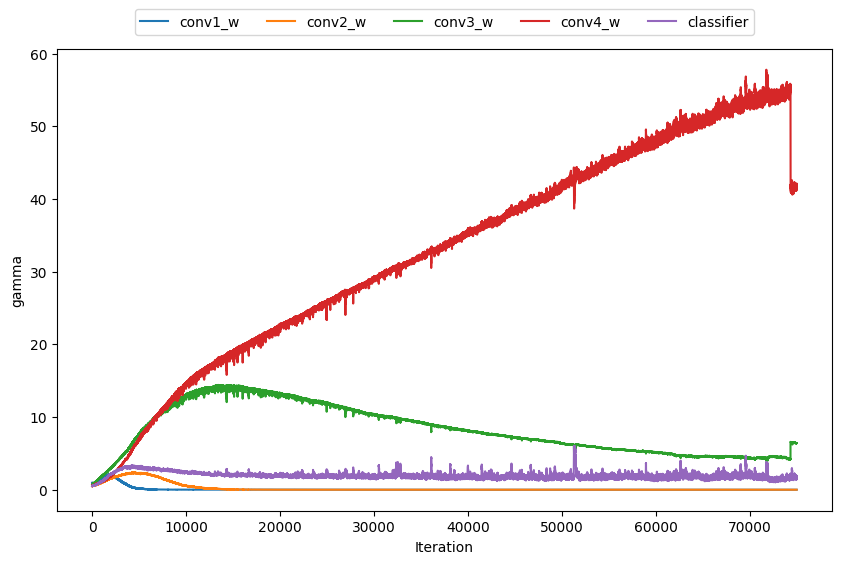

In [18]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


#plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

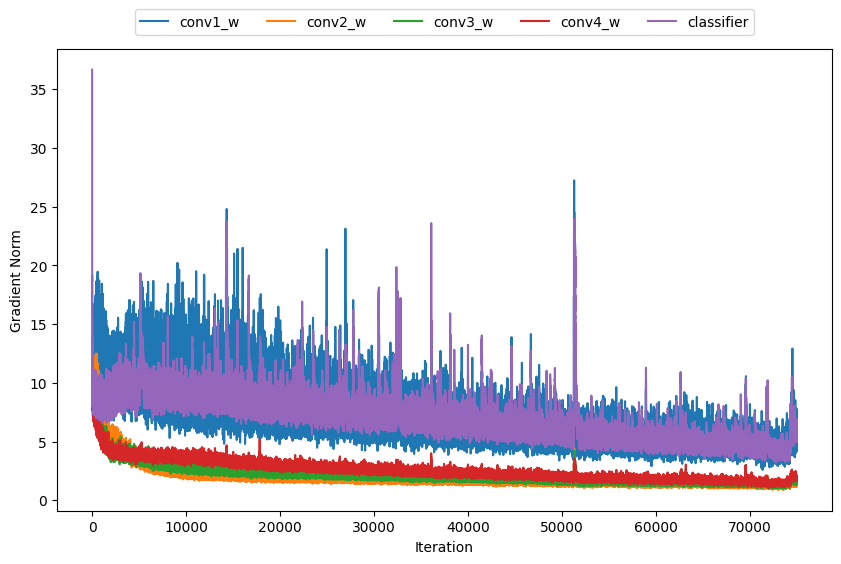

In [19]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

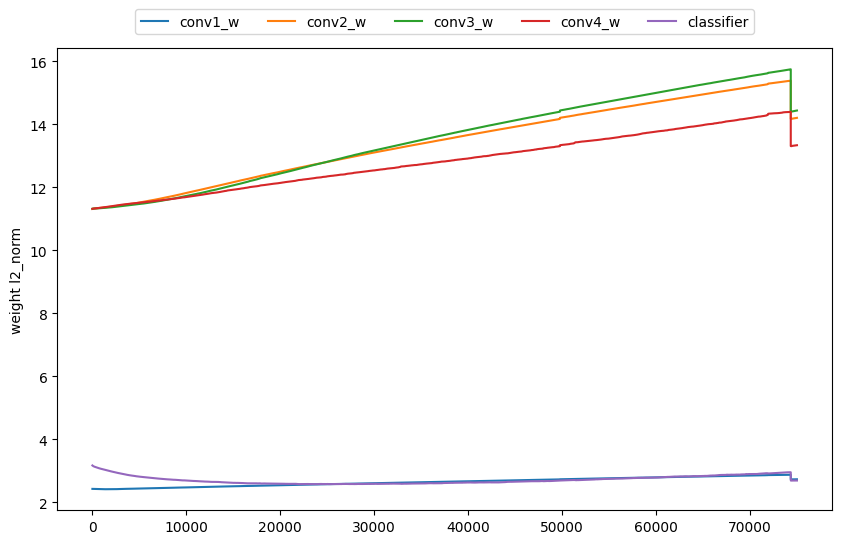

In [20]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

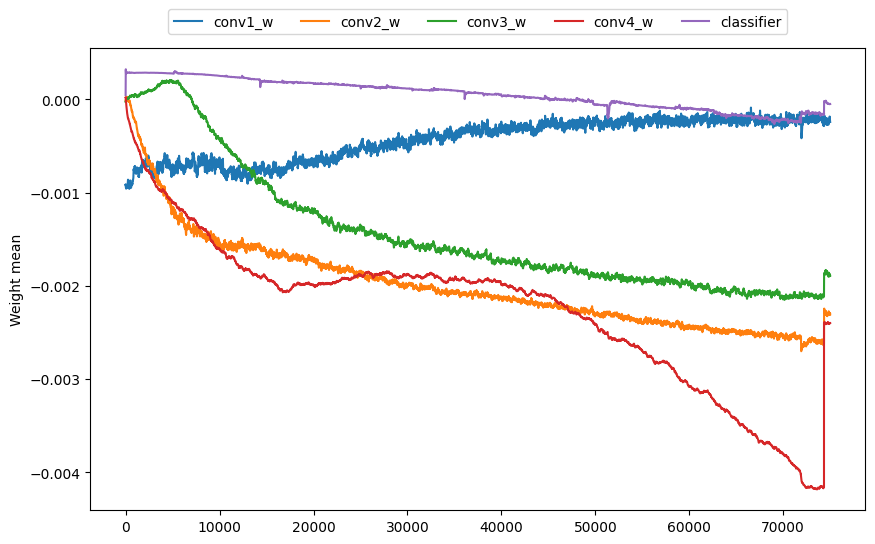

In [21]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

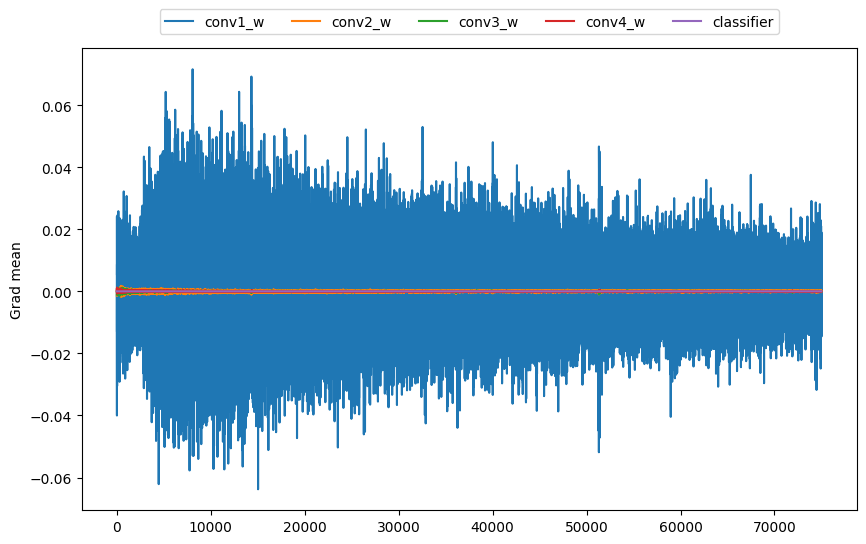

In [22]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# plt.yscale('log', base=10)


plt.show()  # 그래프 보여주기

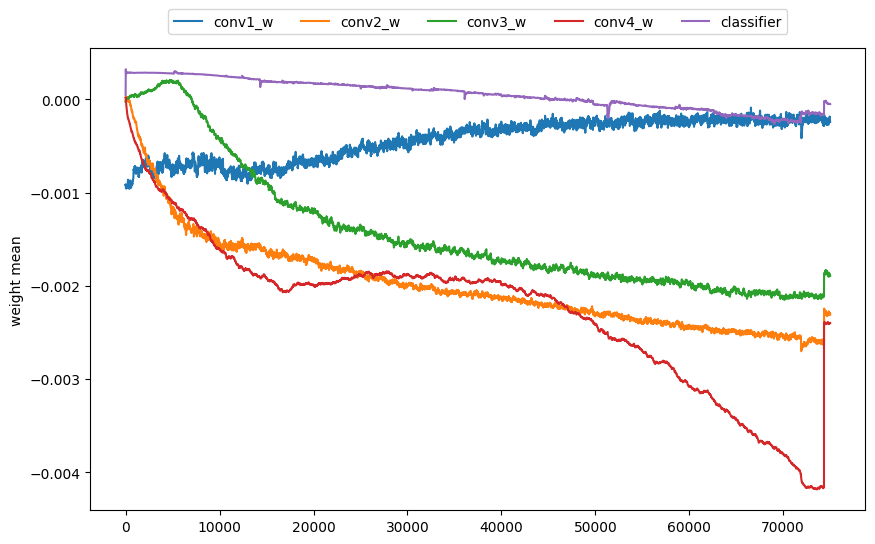

In [23]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기